In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install lime
from lime.lime_tabular import LimeTabularExplainer

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283841 sha256=46fd2c3bb191c84cb4cae27e7ac8d8799a451b99918bf9f8075ec1b21a4e3d86
  Stored in directory: c:\users\zqt\appdata\local\pip\cache\wheels\e7\5d\0e\4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [55]:
df = pd.read_csv('NY-House-Dataset.csv')
df

BROKERTITLE                TYPE  \
0           Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                   Brokered by Serhant      Condo for sale   
2                                Brokered by Sowae Corp      House for sale   
3                                   Brokered by COMPASS      Condo for sale   
4     Brokered by Sotheby's International Realty - E...  Townhouse for sale   
...                                                 ...                 ...   
4796                                Brokered by COMPASS      Co-op for sale   
4797                    Brokered by Mjr Real Estate Llc      Co-op for sale   
4798      Brokered by Douglas Elliman - 575 Madison Ave      Co-op for sale   
4799            Brokered by E Realty International Corp      Condo for sale   
4800                 Brokered by Nyc Realty Brokers Llc      Co-op for sale   

          PRICE  BEDS       BATH  PROPERTYSQFT  \
0        315000     2   2.000000   1400.000000   
1     195000000     7  10.000000  17545.000000   
2        260000     4   2.000000   2015.000000   
3         69000     3   1.000000    445.000000   
4      55000000     7   2.373861  14175.000000   
...         ...   ...        ...           ...   
4796     599000     1   1.000000   2184.207862   
4797     245000     1   1.000000   2184.207862   
4798    1275000     1   1.000000   2184.207862   
4799     598125     2   1.000000    655.000000   
4800     349000     1   1.000000    750.000000   

                                                ADDRESS  \
0                                  2 E 55th St Unit 803   
1     Central Park Tower Penthouse-217 W 57th New Yo...   
2                                      620 Sinclair Ave   
3                               2 E 55th St Unit 908W33   
4                                           5 E 64th St   
...                                                 ...   
4796                               222 E 80th St Apt 3A   
4797                                97-40 62 Dr Unit Lg   
4798                          427 W 21st St Unit Garden   
4799                           91-23 Corona Ave Unit 4G   
4800                            460 Neptune Ave Apt 14O   

                        STATE  \
0          New York, NY 10022   
1          New York, NY 10019   
2     Staten Island, NY 10312   
3         Manhattan, NY 10022   
4          New York, NY 10065   
...                       ...   
4796      Manhattan, NY 10075   
4797      Rego Park, NY 11374   
4798       New York, NY 10011   
4799       Elmhurst, NY 11373   
4800       Brooklyn, NY 11224   

                                           MAIN_ADDRESS  \
0                2 E 55th St Unit 803New York, NY 10022   
1     Central Park Tower Penthouse-217 W 57th New Yo...   
2               620 Sinclair AveStaten Island, NY 10312   
3            2 E 55th St Unit 908W33Manhattan, NY 10022   
4                         5 E 64th StNew York, NY 10065   
...                                                 ...   
4796            222 E 80th St Apt 3AManhattan, NY 10075   
4797             97-40 62 Dr Unit LgRego Park, NY 11374   
4798        427 W 21st St Unit GardenNew York, NY 10011   
4799         91-23 Corona Ave Unit 4GElmhurst, NY 11373   
4800          460 Neptune Ave Apt 14OBrooklyn, NY 11224   

     ADMINISTRATIVE_AREA_LEVEL_2         LOCALITY      SUBLOCALITY  \
0                New York County         New York        Manhattan   
1                  United States         New York  New York County   
2                  United States         New York  Richmond County   
3                  United States         New York  New York County   
4                  United States         New York  New York County   
...                          ...              ...              ...   
4796                    New York  New York County         New York   
4797               United States         New York    Queens County   
4798               United States         New York

In [56]:

# Counting the number of distinct values in each column of the DataFrame
distinct_value_counts = {col: df[col].nunique() for col in df.columns}
distinct_value_counts

{'BROKERTITLE': 1036,
 'TYPE': 13,
 'PRICE': 1274,
 'BEDS': 27,
 'BATH': 22,
 'PROPERTYSQFT': 1445,
 'ADDRESS': 4582,
 'STATE': 308,
 'MAIN_ADDRESS': 4583,
 'ADMINISTRATIVE_AREA_LEVEL_2': 29,
 'LOCALITY': 11,
 'SUBLOCALITY': 21,
 'STREET_NAME': 174,
 'LONG_NAME': 2731,
 'FORMATTED_ADDRESS': 4550,
 'LATITUDE': 4196,
 'LONGITUDE': 4118}

In [57]:
unique_value_counts = {col: df[col].value_counts().head() for col in df.columns}
unique_value_counts

{'BROKERTITLE': BROKERTITLE
 Brokered by COMPASS                              456
 Brokered by Douglas Elliman - 575 Madison Ave    110
 Brokered by Brown Harris Stevens                  93
 Brokered by Corcoran East Side                    91
 Brokered by RE MAX Edge                           79
 Name: count, dtype: int64,
 'TYPE': TYPE
 Co-op for sale                1450
 House for sale                1012
 Condo for sale                 891
 Multi-family home for sale     727
 Townhouse for sale             299
 Name: count, dtype: int64,
 'PRICE': PRICE
 699000     53
 799000     48
 599000     47
 499000     42
 1250000    42
 Name: count, dtype: int64,
 'BEDS': BEDS
 3    1456
 2     995
 1     820
 4     570
 5     360
 Name: count, dtype: int64,
 'BATH': BATH
 2.000000    1671
 1.000000    1521
 4.000000     484
 3.000000     467
 2.373861     302
 Name: count, dtype: int64,
 'PROPERTYSQFT': PROPERTYSQFT
 2184.207862    1621
 800.000000       57
 900.000000       53
 750.000000

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['PRICE_standardized'] = scaler.fit_transform(df[['PRICE']])
sorted_df = df.sort_values(by='PRICE_standardized', ascending=False)
sorted_df = sorted_df[2:]
df = df.drop('BROKERTITLE', axis=1)

In [59]:
sorted_df.head()
sorted_df

BROKERTITLE                TYPE  \
69    Brokered by Sotheby's International Realty - E...  Townhouse for sale   
1075                                Brokered by COMPASS      Co-op for sale   
141       Brokered by Douglas Elliman - 575 Madison Ave      House for sale   
99        Brokered by Douglas Elliman - 575 Madison Ave      House for sale   
4     Brokered by Sotheby's International Realty - E...  Townhouse for sale   
...                                                 ...                 ...   
979                                 Brokered by COMPASS      Condo for sale   
463                Brokered by Morris Park Realty Group      Co-op for sale   
360                 Brokered by Century 21 Realty First       Land for sale   
310                 Brokered by Living NY - Main Office            For sale   
317                 Brokered by Living NY - Main Office            For sale   

         PRICE  BEDS       BATH  PROPERTYSQFT                      ADDRESS  \
69    65000000     3   2.373861  15200.000000                  4 E 79th St   
1075  60000000     8   8.000000   2184.207862          960 5th Ave Unit 12   
141   56000000    11  10.000000  24000.000000                  9 W 54th St   
99    55000000     8   8.000000  12000.000000              25 Riverside Dr   
4     55000000     7   2.373861  14175.000000                  5 E 64th St   
...        ...   ...        ...           ...                          ...   
979      60000     3   1.000000    445.000000      2 E 55th St Unit 809W35   
463      49500     3   2.373861    800.000000  150 City Island Ave Unit E3   
360       5800     3   2.373861   2184.207862          4515 Avenue N Lot 5   
310       3225     3   1.000000   2184.207862        635 W 170th St Apt 2C   
317       2494     2   1.000000   2184.207862        635 W 170th St Apt 4F   

                    STATE                                MAIN_ADDRESS  \
69     New York, NY 10075               4 E 79th StNew York, NY 10075   
1075  Manhattan, NY 10075      960 5th Ave Unit 12Manhattan, NY 10075   
141    New York, NY 10019               9 W 54th StNew York, NY 10019   
99     New York, NY 10023           25 Riverside DrNew York, NY 10023   
4      New York, NY 10065               5 E 64th StNew York, NY 10065   
...                   ...                                         ...   
979   Manhattan, NY 10022  2 E 55th St Unit 809W35Manhattan, NY 10022   
463       Bronx, NY 10464  150 City Island Ave Unit E3Bronx, NY 10464   
360    Brooklyn, NY 11234       4515 Avenue N Lot 5Brooklyn, NY 11234   
310    New York, NY 10032     635 W 170th St Apt 2CNew York, NY 10032   
317    New York, NY 10032     635 W 170th St Apt 4FNew York, NY 10032   

     ADMINISTRATIVE_AREA_LEVEL_2         LOCALITY      SUBLOCALITY  \
69                 United States         New York  New York County   
1075                    New York  New York County         New York   
141                United States         New York  New York County   
99                 United States         New York  New York County   
4                  United States         New York  New York County   
...                          ...              ...              ...   
979                     New York  New York County         New York   
463                     New York     Bronx County        The Bronx   
360                     New York     Kings County         Brooklyn   
310                     New York  New York County         New York   
317                     New York  New York County         New York   

      STREET_NAME         LONG_NAME  \
69       New York  East 79th Street   
1075    Manhattan               960   
141      New York  West 54th Street   
99       New York   Riverside Drive   
4        New York  East 64th Street   
...           ...               ...   
979     Manhattan                 2   
463   City Island               150   
360     Flatlands              4515   
310     Manhattan               635   
317     Man

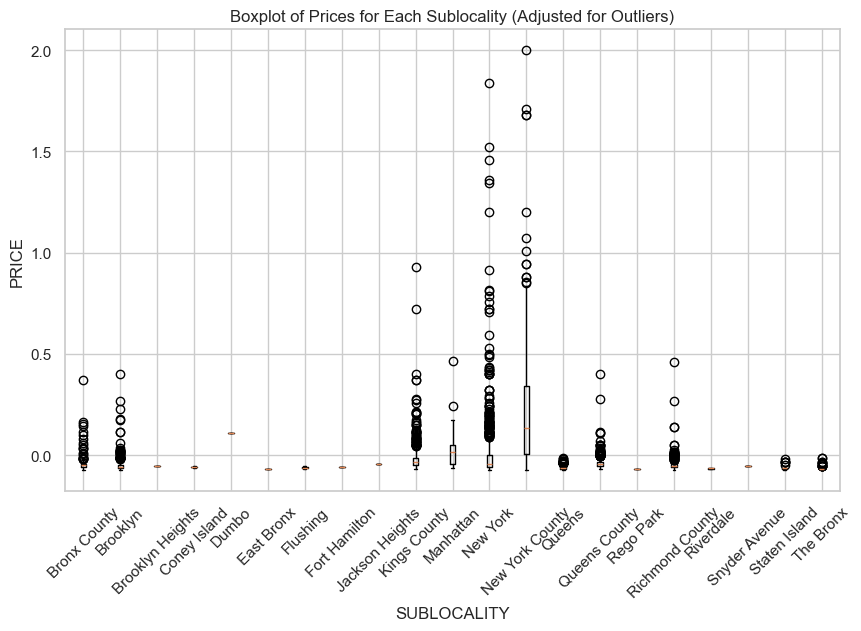

In [60]:
import matplotlib.pyplot as plt

grouped = sorted_df.groupby('SUBLOCALITY')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create a list for x-tick labels
xticklabels = []
positions = []

for i, (name, group) in enumerate(grouped):
    # Adjust the 'whis' parameter here, e.g., 1.0, 1.5, etc.
    ax.boxplot(group['PRICE_standardized'], positions=[i], whis=1.5)

    xticklabels.append(name)
    positions.append(i)

# Set x-axis label
ax.set_xlabel('SUBLOCALITY')

# Set y-axis label
ax.set_ylabel('PRICE')

# Set x-tick labels
ax.set_xticks(positions)
ax.set_xticklabels(xticklabels, rotation=45)  # Rotate for better readability if needed

# Set title
ax.set_title('Boxplot of Prices for Each Sublocality (Adjusted for Outliers)')

# Show plot
plt.show()

C:\Users\zqt\AppData\Local\Temp\ipykernel_21720\2344466157.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=average_prices.index, y=average_prices.values, palette="viridis")


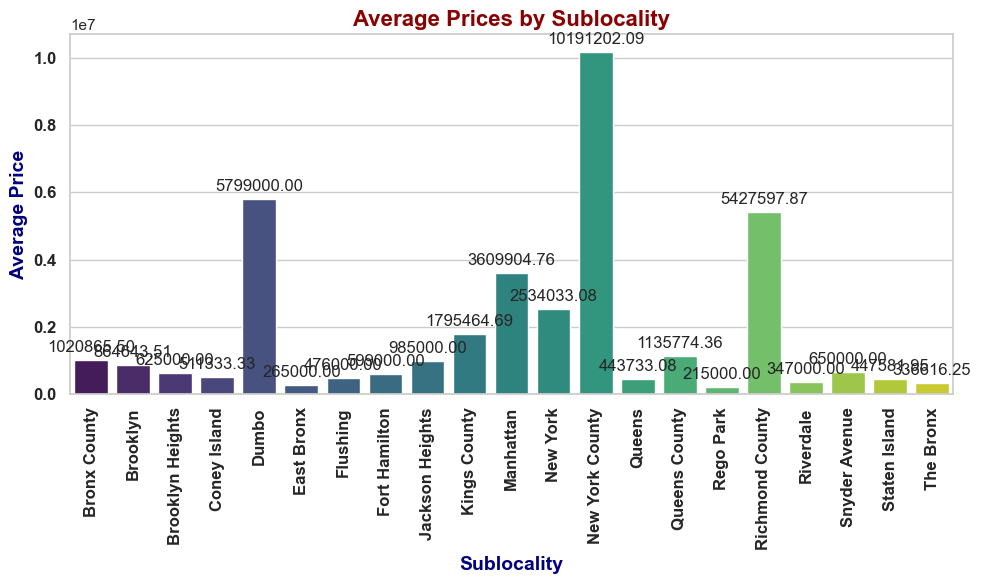

In [62]:
import seaborn as sns

average_prices = df.groupby('SUBLOCALITY')['PRICE'].mean()

# Using seaborn's style
sns.set(style="whitegrid")

# Plotting the average prices
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=average_prices.index, y=average_prices.values, palette="viridis")

# Adding labels and title with more customization
plt.xlabel('Sublocality', fontsize=14, fontweight='bold', color='navy')
plt.ylabel('Average Price', fontsize=14, fontweight='bold', color='navy')
plt.title('Average Prices by Sublocality', fontsize=16, fontweight='bold', color='darkred')

# Customizing ticks for readability
plt.xticks(fontsize=12, fontweight='bold', rotation=90)
plt.yticks(fontsize=12, fontweight='bold')

# Adding value labels on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
label_encoder = LabelEncoder()
df['SUBLOCALITY_encoded'] = label_encoder.fit_transform(df['SUBLOCALITY'])
df
# Selecting the features (X) and the target (Y)
X = df[['SUBLOCALITY_encoded', 'PRICE', 'BEDS', 'BATH']]
Y = df['TYPE']

df.drop('PRICE', axis=1)

TYPE  BEDS       BATH  PROPERTYSQFT  \
0         Condo for sale     2   2.000000   1400.000000   
1         Condo for sale     7  10.000000  17545.000000   
2         House for sale     4   2.000000   2015.000000   
3         Condo for sale     3   1.000000    445.000000   
4     Townhouse for sale     7   2.373861  14175.000000   
...                  ...   ...        ...           ...   
4796      Co-op for sale     1   1.000000   2184.207862   
4797      Co-op for sale     1   1.000000   2184.207862   
4798      Co-op for sale     1   1.000000   2184.207862   
4799      Condo for sale     2   1.000000    655.000000   
4800      Co-op for sale     1   1.000000    750.000000   

                                                ADDRESS  \
0                                  2 E 55th St Unit 803   
1     Central Park Tower Penthouse-217 W 57th New Yo...   
2                                      620 Sinclair Ave   
3                               2 E 55th St Unit 908W33   
4                                           5 E 64th St   
...                                                 ...   
4796                               222 E 80th St Apt 3A   
4797                                97-40 62 Dr Unit Lg   
4798                          427 W 21st St Unit Garden   
4799                           91-23 Corona Ave Unit 4G   
4800                            460 Neptune Ave Apt 14O   

                        STATE  \
0          New York, NY 10022   
1          New York, NY 10019   
2     Staten Island, NY 10312   
3         Manhattan, NY 10022   
4          New York, NY 10065   
...                       ...   
4796      Manhattan, NY 10075   
4797      Rego Park, NY 11374   
4798       New York, NY 10011   
4799       Elmhurst, NY 11373   
4800       Brooklyn, NY 11224   

                                           MAIN_ADDRESS  \
0                2 E 55th St Unit 803New York, NY 10022   
1     Central Park Tower Penthouse-217 W 57th New Yo...   
2               620 Sinclair AveStaten Island, NY 10312   
3            2 E 55th St Unit 908W33Manhattan, NY 10022   
4                         5 E 64th StNew York, NY 10065   
...                                                 ...   
4796            222 E 80th St Apt 3AManhattan, NY 10075   
4797             97-40 62 Dr Unit LgRego Park, NY 11374   
4798        427 W 21st St Unit GardenNew York, NY 10011   
4799         91-23 Corona Ave Unit 4GElmhurst, NY 11373   
4800          460 Neptune Ave Apt 14OBrooklyn, NY 11224   

     ADMINISTRATIVE_AREA_LEVEL_2         LOCALITY      SUBLOCALITY  \
0                New York County         New York        Manhattan   
1                  United States         New York  New York County   
2                  United States         New York  Richmond County   
3                  United States         New York  New York County   
4                  United States         New York  New York County   
...                          ...              ...              ...   
4796                    New York  New York County         New York   
4797               United States         New York    Queens County   
4798               United States         New York  New York County   
4799                    New York    Queens County           Queens   
4800                    New York     Kings County         Brooklyn   

           STREET_NAME         LONG_NAME  \
0     East 55th Street   Regis Residence   
1             New York  West 57th Street   
2        Staten Island   Sinclair Avenue   
3             New York  East 55th Street   
4             New York  East 64th Street   
...                ...               ...   
4796         Manhattan               222   
4797            Queens        62nd Drive   
4798          New York  West 21st Street   
4799          Flushing             91-23   
4800      Coney Island               460   

                                      FORMATTED_ADDRESS   LATITUDE  LONGITUDE  \
0     Regis Residence, 2 E 55th St #803, New 

In [64]:
Y.value_counts()

TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Condop for sale                  5
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

In [65]:
X.head()

SUBLOCALITY_encoded      PRICE  BEDS       BATH
0                   10     315000     2   2.000000
1                   12  195000000     7  10.000000
2                   16     260000     4   2.000000
3                   12      69000     3   1.000000
4                   12   55000000     7   2.373861

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [118]:
df.columns

Index(['TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'ADDRESS', 'STATE',
       'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY',
       'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS',
       'LATITUDE', 'LONGITUDE', 'PRICE_standardized', 'SUBLOCALITY_encoded'],
      dtype='object')

In [150]:
from sklearn.model_selection import train_test_split

X = df.drop('PRICE', axis=1)
y = df['PRICE']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [152]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['ADMINISTRATIVE_AREA_LEVEL_2', 'SUBLOCALITY', 'TYPE', 'LOCALITY', 'STATE', 'ADDRESS', 'MAIN_ADDRESS', 'STREET_NAME','LONG_NAME']  
numeric_features = ['PROPERTYSQFT', 'BEDS', 'BATH', 'LATITUDE', 'LONGITUDE', 'PRICE_standardized', 'SUBLOCALITY_encoded']  

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        
    ],
    remainder='passthrough' 
)

In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
# Splitting the data into features (X) and target variable (y)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model .fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 35571.20601456816
Mean Squared Error: 175105893050.34143
R² Score: 0.9930499287824616


In [128]:
def lime_predict_fn(x):
    x_df = pd.DataFrame(x, columns=X_train.columns)
    return model.predict(x_df)

In [154]:
# Assuming this part comes after your model has made predictions
from lime.lime_tabular import LimeTabularExplainer
from collections import defaultdict 

np.random.seed(42)

# Initialize the explainer
explainer = LimeTabularExplainer(training_data=X_train.values,
                                 feature_names=X_train.columns.tolist(),
                                 class_names=['Price'],
                                 mode='regression')

# Select an instance to explain
instance_index = 0  # Example index, choose appropriately
instance = X_test.iloc[instance_index]

num_runs = 10

feature_importance_dict = defaultdict(list)

for _ in range(num_runs):
# Generate explanation
    exp = explainer.explain_instance(data_row=instance, predict_fn=lime_predict_fn, num_samples=10000)

    for feature, weight in exp.as_list():
        feature_importance_dict[feature].append(weight)

average_importance = {feature: np.mean(weights) for feature, weights in feature_importance_dict.items()}
# Visualize the explanation
exp.show_in_notebook(show_table=True)

for feature, avg_weight in average_importance.items():
    print(f"Feature: {feature}, Average Importance: {avg_weight}")

d:\conda\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
d:\conda\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
d:\conda\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  binary_column = (inverse_c

Feature: 324.00 < PRICE_standardized <= 559.00, Average Importance: -1434916.3207728565
Feature: -0.19 < BATH <= 0.32, Average Importance: 42590.70560914137
Feature: 2308.50 < ADDRESS <= 3431.25, Average Importance: -3189.959651955732
Feature: STREET_NAME > 133.00, Average Importance: 25340.36397766677
Feature: 2308.50 < MAIN_ADDRESS <= 3431.25, Average Importance: -34288.16327130048
Feature: PROPERTYSQFT > 0.00, Average Importance: 99335.00832936577
Feature: LATITUDE <= 1121.75, Average Importance: 19706.303145784877
Feature: LOCALITY <= 4.00, Average Importance: 1843.4761361637222
Feature: STATE > 213.00, Average Importance: 46213.03030106369
Feature: LONGITUDE <= 1059.75, Average Importance: -48334.823663875715
Feature: 2296.00 < FORMATTED_ADDRESS <= 3412.25, Average Importance: 30215.1920847786
Feature: -0.14 < BEDS <= 0.25, Average Importance: 35920.559765463404
Feature: SUBLOCALITY > 14.00, Average Importance: -64513.28755857626
Feature: SUBLOCALITY_encoded > 14.00, Average Impor

In [183]:
columns_to_remove = ['PROPERTYSQFT', 'BATH', 'BEDS']
df_predict_price_L1 = df.drop(columns=columns_to_remove)

df_predict_price_L1.head()

TYPE      PRICE  ADDRESS  STATE  MAIN_ADDRESS  ADMINISTRATIVE_AREA_LEVEL_2  \
0     2     315000     1421    207          1421                           26   
1     2  195000000     4576    205          4577                           28   
2     7     260000     3684    301          3684                           28   
3     2      69000     1423    161          1423                           28   
4    12   55000000     3278    227          3278                           28   

   LOCALITY  SUBLOCALITY  STREET_NAME  LONG_NAME  FORMATTED_ADDRESS  LATITUDE  \
0         4           10           56       2427               4541      2883   
1         4           12          117       2679               1647      3010   
2         4           16          153       2507               3625        90   
3         4           12          117       1894               1407      2885   
4         4           12          117       1903               3228      3034   

   LONGITUDE  PRICE_standardized  SUBLOCALITY_encoded  
0       1395                 179                   10  
1       1227                1272                   12  
2         69                 125                   16  
3       1393                   6                   12  
4       1505                1268                   12

In [185]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features_L = ['ADMINISTRATIVE_AREA_LEVEL_2', 'SUBLOCALITY', 'TYPE', 'LOCALITY', 'STATE', 'ADDRESS', 'MAIN_ADDRESS', 'STREET_NAME','LONG_NAME']  
numeric_features_L = ['LATITUDE', 'LONGITUDE', 'PRICE_standardized', 'SUBLOCALITY_encoded']  

preprocessor_L = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_L),
        
    ],
    remainder='passthrough' 
)

In [186]:
from sklearn.model_selection import train_test_split

X = df_predict_price_L1.drop('PRICE', axis=1)
y = df_predict_price_L1['PRICE']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [187]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
# Splitting the data into features (X) and target variable (y)
model = Pipeline(steps=[
    ('preprocessor', preprocessor_L),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model .fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 40685.63350676379
Mean Squared Error: 212895590158.4223
R² Score: 0.9915500301690274


In [163]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('PRICE', axis=1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Gradient Boosting Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Hyperparameter Grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best parameters:", grid_search.best_params_)

# Best Model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Best parameters: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Mean Squared Error: 2514773753859.0938
R² Score: 0.90018693042905


In [188]:
# Assuming this part comes after your model has made predictions
from lime.lime_tabular import LimeTabularExplainer
from collections import defaultdict 

np.random.seed(42)

# Initialize the explainer
explainer = LimeTabularExplainer(training_data=X_train.values,
                                 feature_names=X_train.columns.tolist(),
                                 class_names=['Price'],
                                 mode='regression')

# Select an instance to explain
instance_index = 0  # Example index, choose appropriately

num_runs = 10

feature_importance_dict = defaultdict(list)

for _ in range(num_runs):
# Generate explanation
    instance = X_test.iloc[i]
    exp = explainer.explain_instance(data_row=instance, predict_fn=lime_predict_fn, num_samples=10000)

    for feature, weight in exp.as_list():
        feature_importance_dict[feature].append(weight)

average_importance = {feature: np.mean(weights) for feature, weights in feature_importance_dict.items()}
# Visualize the explanation
exp.show_in_notebook(show_table=True)

for feature, avg_weight in average_importance.items():
    print(f"Feature: {feature}, Average Importance: {avg_weight}")

d:\conda\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
d:\conda\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
d:\conda\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  binary_column = (inverse_c

Feature: PRICE_standardized <= 324.00, Average Importance: -1925104.2670874365
Feature: LOCALITY > 5.00, Average Importance: 63235.67111476392
Feature: STATE <= 64.00, Average Importance: -3932.453969396544
Feature: TYPE <= 0.00, Average Importance: 92816.92901699863
Feature: 1132.75 < FORMATTED_ADDRESS <= 2296.00, Average Importance: 46015.015913573494
Feature: 1143.75 < MAIN_ADDRESS <= 2308.50, Average Importance: 5629.82530795249
Feature: 11.00 < SUBLOCALITY <= 14.00, Average Importance: 5896.722423140779
Feature: 1143.75 < ADDRESS <= 2308.50, Average Importance: 24911.693848766405
Feature: LONG_NAME <= 612.00, Average Importance: -1810.9394411623045
Feature: 2163.50 < LATITUDE <= 3166.50, Average Importance: -61190.0089236206
Feature: LONGITUDE > 3061.25, Average Importance: -45808.67591055649
Feature: 11.00 < SUBLOCALITY_encoded <= 14.00, Average Importance: 18787.919645419373
Feature: STREET_NAME <= 71.00, Average Importance: 2315.3488976229505
Feature: ADMINISTRATIVE_AREA_LEVEL_

In [193]:
columns_to_remove = ['STATE', 'LOCALITY', 'TYPE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'STREET_NAME',  'SUBLOCALITY_encoded']
df_predict_price_L2 = df.drop(columns=columns_to_remove)

df_predict_price_L2.head()

categorical_features_L2 = ['SUBLOCALITY', 'ADDRESS', 'MAIN_ADDRESS', 'LONG_NAME']  
numeric_features_L2 = ['PROPERTYSQFT', 'BEDS', 'BATH', 'LATITUDE', 'LONGITUDE', 'PRICE_standardized']  

preprocessor_L2 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_L2),
        
    ],
    remainder='passthrough' 
)

In [194]:
X = df_predict_price_L2.drop('PRICE', axis=1)
y = df_predict_price_L2['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Gradient Boosting Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_L2),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Hyperparameter Grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best parameters:", grid_search.best_params_)

# Best Model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Best parameters: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Mean Squared Error: 3162803434489.171
R² Score: 0.8744661945189063


In [195]:
!pip install xgboost
from xgboost                 import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Splitting the data into features (X) and target variable (y)
X = df.drop('PRICE', axis=1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, verbosity=0)) 
])

# Train the model
pipeline.fit(X_train, y_train)


# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 141616.42638690167
Mean Squared Error: 2038740272095.6458
R² Score: 0.9190810322761536


In [196]:
# Assuming this part comes after your model has made predictions
from lime.lime_tabular import LimeTabularExplainer
from collections import defaultdict 

np.random.seed(42)

# Initialize the explainer
explainer = LimeTabularExplainer(training_data=X_train.values,
                                 feature_names=X_train.columns.tolist(),
                                 class_names=['Price'],
                                 mode='regression')

# Select an instance to explain
instance_index = 0  # Example index, choose appropriately

num_runs = 10

feature_importance_dict = defaultdict(list)

for _ in range(num_runs):
# Generate explanation
    instance = X_test.iloc[i]
    exp = explainer.explain_instance(data_row=instance, predict_fn=lime_predict_fn, num_samples=10000)

    for feature, weight in exp.as_list():
        feature_importance_dict[feature].append(weight)

average_importance = {feature: np.mean(weights) for feature, weights in feature_importance_dict.items()}
# Visualize the explanation
exp.show_in_notebook(show_table=True)

for feature, avg_weight in average_importance.items():
    print(f"Feature: {feature}, Average Importance: {avg_weight}")


d:\conda\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
d:\conda\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
d:\conda\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  binary_column = (inverse_c

Feature: PRICE_standardized <= 324.00, Average Importance: -1894178.1817695196
Feature: 11.00 < SUBLOCALITY_encoded <= 14.00, Average Importance: 5654.881185614055
Feature: 2164.50 < LATITUDE <= 3144.25, Average Importance: -48486.34586537482
Feature: -0.41 < PROPERTYSQFT <= 0.00, Average Importance: 904.9310082364187
Feature: STATE <= 65.00, Average Importance: -51838.58225610045
Feature: BEDS <= -0.52, Average Importance: 11684.21566717223
Feature: 1159.75 < MAIN_ADDRESS <= 2315.50, Average Importance: 69120.51419596396
Feature: BATH <= -0.71, Average Importance: -5224.170764610721
Feature: LOCALITY > 5.00, Average Importance: 17114.59165474585
Feature: TYPE <= 0.00, Average Importance: -115.85641664891487
Feature: LONGITUDE > 3062.00, Average Importance: 37195.846847836954
Feature: STREET_NAME <= 71.00, Average Importance: -36023.773986863074
Feature: 1148.00 < FORMATTED_ADDRESS <= 2296.50, Average Importance: -13370.815383838111
Feature: ADMINISTRATIVE_AREA_LEVEL_2 <= 25.00, Averag

In [197]:
columns_to_remove = ['STATE', 'LOCALITY', 'TYPE', 'SUBLOCALITY','ADMINISTRATIVE_AREA_LEVEL_2',  'SUBLOCALITY_encoded']
df_predict_price_L3 = df.drop(columns=columns_to_remove)

df_predict_price_L3.head()

categorical_features_L3 = ['SUBLOCALITY', 'ADDRESS', 'MAIN_ADDRESS', 'STREET_NAME', 'LONG_NAME']  
numeric_features_L3 = ['PROPERTYSQFT', 'BEDS', 'BATH', 'LATITUDE', 'LONGITUDE', 'PRICE_standardized']  

preprocessor_L3 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_L3),
        
    ],
    remainder='passthrough' 
)

In [199]:
X = df_predict_price_L2.drop('PRICE', axis=1)
y = df_predict_price_L2['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Gradient Boosting Regressor
# Initialize the Random Forest Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_L2),
    ('regressor', XGBRegressor(random_state=42, verbosity=0)) 
])

# Train the model
pipeline.fit(X_train, y_train)


# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 140517.34142494798
Mean Squared Error: 1944890094639.8179
R² Score: 0.9228059649467468
